In [1]:
# Import and combine data
import pickle
import pandas
nearby_stores = pickle.load(open( "nearby_stores.p", "rb" ) )
query_results = pickle.load(open( "query_results.p", "rb" ) )
query_results = query_results.loc[:,~query_results.columns.duplicated()] 
nearby_stores.set_index('business_id', inplace=True)
storematch_df = nearby_stores.join(query_results,how="inner")

shopping_list = list(query_results.columns)


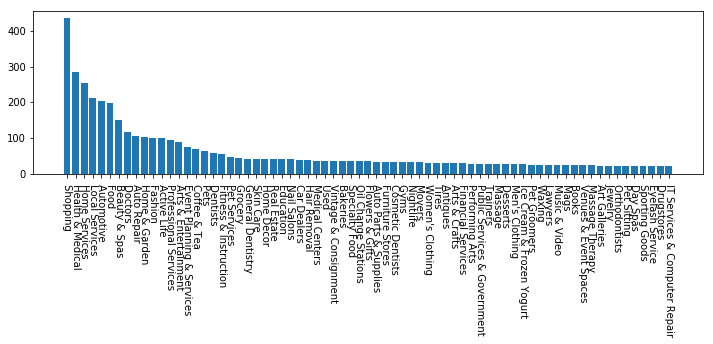

In [19]:
# Main goal here is to look at some lines of prediction, like:
# - how much do query results change for given categories?

import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


# Step 1: show category contents (...again)
all_tags = ((storematch_df['categories']).str.cat(sep=', ')).split(',')
tag_counts = Counter(all_tags)
df = (pd.DataFrame.from_dict(tag_counts, orient='index')).sort_values(by=[0],ascending=False)
df.reset_index(level=0, inplace=True)
df.rename(columns={0: "count", "index": "category"},inplace=True)
df1 = df[df['count']>20];
plt.figure(figsize=[12,3])
plt.bar(df1['category'].tolist(),df1['count'])
plt.xticks(rotation=270)
plt.show()

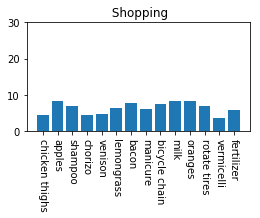

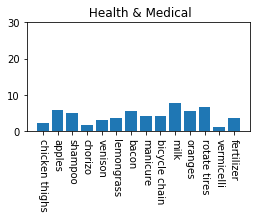

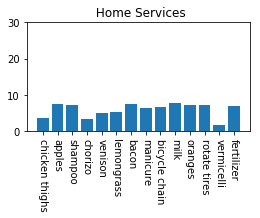

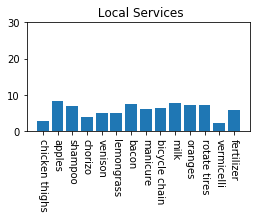

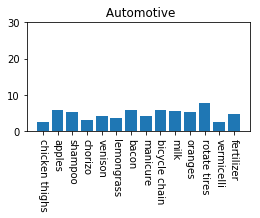

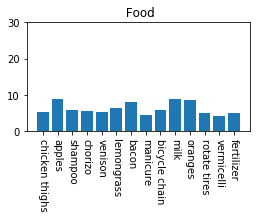

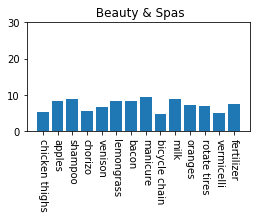

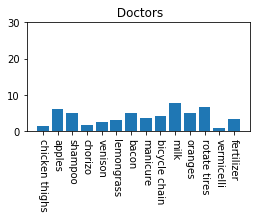

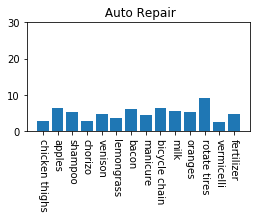

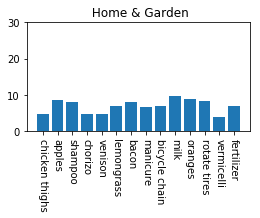

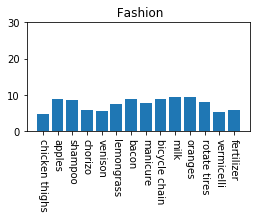

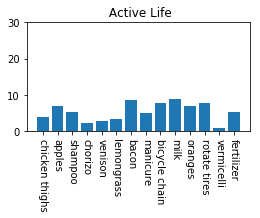

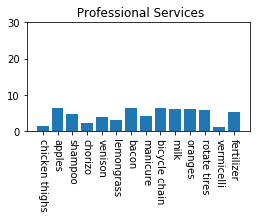

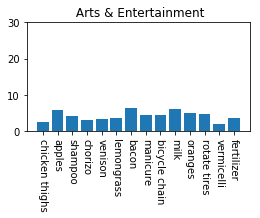

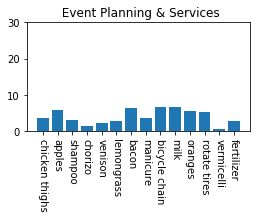

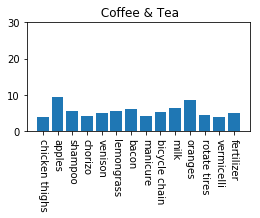

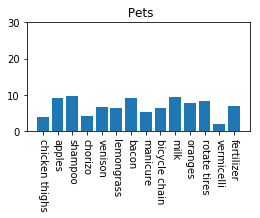

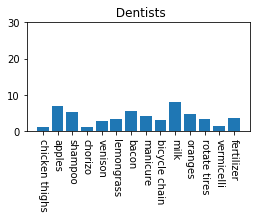

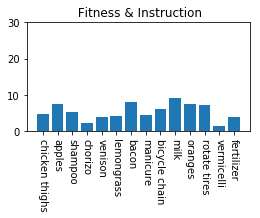

In [3]:
# Let's do a series of plots to show, for all top categories, what the query "signature" looks like
for category in df1['category']:
    # there's a weird leading space on the category strings so omit it
    subs = storematch_df.loc[[category[1:] in str1 for str1 in storematch_df['categories'].values],:]
    # Filter further - anything where min > 15, or max<=3
    subs = subs.filter(items=shopping_list,axis='columns')
    subs = subs.iloc[(subs.max(axis=1).values > 3),:]
    subs = subs.iloc[(subs.min(axis=1).values < 15),:]
    scores = subs.mean() # will skip non-numerics
    
    plt.figure(figsize=[4,2])
    plt.bar(list(subs.columns),scores)
    plt.xticks(rotation=270)
    plt.title(category)
    plt.ylim((0,30))
    plt.show()
    
    
   


In [16]:
# Let's generate top rankings for each query - for now, we'll rank by max / 25th percentile
queryvals = storematch_df.filter(items=shopping_list,axis='columns')
for item in shopping_list:
    item_score = (((1+queryvals[item]) - (1+queryvals.quantile(q=0.25,axis=1))).sort_values(ascending=False))
    item_score = item_score.iloc[(item_score>4).values]
    if len(item_score)>12:
        item_score = item_score[0:11]
    
    print(item,':')
    print((nearby_stores.loc[item_score.index])['name'].values)    
    print('- - - - - ')

chicken thighs :
["St. Joseph's Hospital and Medical Center" 'Elements Massage'
 'Tracy Teitelbaum' 'Tough Mudder - Arizona' 'Papyrus' 'KPNX 12 News'
 'PetSmart' "Howard's Ace Hardware" 'Granada Park' 'Hot Rod Grill'
 'K1 Speed']
- - - - - 
apples :
['Hot Rod Grill' 'Data Doctors of Central Phoenix' 'PetSmart'
 'Antigua Bakery' 'JCPenney' 'Red Star Vapor' 'Roadrunner Florist'
 'Maricopa County Animal Care & Control' 'Bank of America'
 'Flower Delivery Express' 'Superior Court Of Arizona']
- - - - - 
shampoo :
['PetSmart' 'JCPenney' 'Dyna-Tronics' 'Westwind Dental Downtown'
 'Paul Woodbury, DMD' 'Stuart L Posner, MD' "Boom Boom La Rue's"
 'Amnon Kahane, MD' 'Citrine Natural Beauty Bar'
 'BodySmart Massage & Bodywork' 'Floor & Decor']
- - - - - 
chorizo :
['Antigua Bakery' "Flo's on 7th" 'Superior Court Of Arizona'
 'Phoenician Nails' 'Maricopa County Animal Care & Control'
 'Los Altos Ranch Market' "Fry's Food Stores" "Fry's Marketplace"
 'Old Heidelberg German Bakery' 'Food City' "Pro'

In [17]:
np.mean([0,0,2,3,0,0, 5,1,0,0,1,3,1])

1.2307692307692308

In [20]:
np.mean([1, 6/7, 1,1, 2/3, 1, .7, .6, .8, .8, 1])

0.8567099567099568

In [71]:
shopping_list = list(query_results.columns)


In [72]:
shopping_list

['chicken thighs',
 'apples',
 'shampoo',
 'chorizo',
 'venison',
 'lemongrass',
 'bacon',
 'manicure',
 'bicycle chain',
 'milk',
 'oranges',
 'rotate tires',
 'vermicelli',
 'fertilizer']

In [79]:
subs.filter(items=shopping_list,axis='columns')


,chicken thighs,apples,shampoo,chorizo,venison,lemongrass,bacon,manicure,bicycle chain,milk,oranges,rotate tires,vermicelli,fertilizer
business_id,,,,,,,,,,,,,,
0EtTrh5fRGXaZXHrlTt4pg,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3C0gL4CHLATs2pLGvmptEQ,0.0,4.0,2.0,0.0,2.0,2.0,5.0,2.0,0.0,5.0,1.0,0.0,0.0,0.0
3i80fRE3_c2FhL1yowS7fA,0.0,2.0,2.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0
3nniUqnTZCjcExh6Gl--uQ,0.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,2.0
59UK1BDCstvfcdSGnOKioQ,0.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
5BA9l5NiPYI_MfoiWnWLGw,0.0,2.0,2.0,0.0,0.0,3.0,2.0,2.0,3.0,0.0,0.0,1.0,0.0,2.0
5kA_jBINUW2iiO_prsCVcg,11.0,11.0,3.0,1.0,0.0,1.0,2.0,2.0,11.0,11.0,7.0,11.0,0.0,2.0
5t-2P_ij_df7gGR0CtGvQQ,7.0,6.0,0.0,0.0,0.0,0.0,11.0,2.0,3.0,11.0,9.0,11.0,0.0,2.0
7qH4yhLwwDwIi9tsI8AtKQ,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0


In [21]:
len(nearby_stores)

1693

In [ ]:
rotate tires
tomatoes
apples
oranges
potting soil